In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [6]:
data_iris=datasets.load_iris()
X=data_iris.data
Y=data_iris.target
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
print(X_train.shape)
print(Y_train.shape)

(105, 4)
(105,)


## Finding the best value of K for KNN

In [13]:
import matplotlib.pyplot as plt

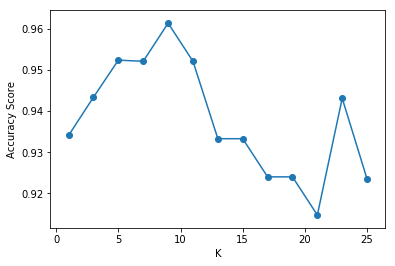

In [19]:
## Find the value of K where the accuracy is most
##We will Plot the simple graph
## We take odd value of K so there is no tie in result
X=[]
Y=[]
for i in range(1,26,2):
    clf=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(clf,X_train,Y_train)
    X.append(i);
    Y.append(score.mean())
    ##print(i,score.mean())
plt.plot(X,Y)
plt.scatter(X,Y)
plt.xlabel("K")
plt.ylabel("Accuracy Score")
plt.show()

## As we see the K=9 as maximum accuracy

In [22]:
## Train the Classifier with n_neighbors=9
clf=KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train,Y_train)
Y_test_predict=clf.predict(X_test)
print(accuracy_score(Y_test,Y_test_predict))

0.9777777777777777


## Implement the KNN with Force Brute Search

In [26]:
##In Force Brute Search we don't need Fit Function
## As we process it at Testing Time
from collections import Counter

In [59]:
def predictSinglePoint(X_train,Y_train,single_data,K):
    distance=[]
    for i in range(len(X_train)):
        ## Here we take eucleidian distance i.e P=2
        ## i signify the training set 
        single_training_distance=((X_train[i,:]-single_data)**2).sum()
        distance.append([single_training_distance,i])
    ## Now Sort the distance to get K maximum training set
    distance=sorted(distance)
    Y_predicted=[]
    for i in range(K):
        single_training_data=distance[i][1]
        Y_predicted.append(Y_train[single_training_data])
    ## We have to count which Y value is maximum in Y_predicted to get acutal Y_predict
    ## So we use Counter to get the value
    ## most_common gives the all values and its count
    ##But we want only maximum value so most_common(1)
    ##From that tuple we choose first element most_common(1)[0]
    ##We have choose the value not count so most_common(1)[0][0]
    Y_single=Counter(Y_predicted).most_common(1)[0][0]
    return Y_single

In [55]:
def predict(X_train,Y_train,X_test,K):
    Y_test_predict=[]
    for single_data in X_test:
        Y_single_data=predictSinglePoint(X_train,Y_train,single_data,K)
        Y_test_predict.append(Y_single_data)
    return Y_test_predict    

In [60]:
Y_test_predict_Force=predict(X_train,Y_train,X_test,9)
print(accuracy_score(Y_test,Y_test_predict_Force))

0.9777777777777777


## Both have same accuracy Score